# Chapter 3 - Exercise 3: Photolithography Pattern Designer
## Biofabrication Course - VU Brussels

This notebook covers:
- Resolution limits in photolithography
- Aspect ratio constraints
- Multi-layer alignment strategies
- Fabrication method comparisons

KEY LEARNING FEATURES:
- Calculate minimum feature sizes
- Design microfluidic patterns
- Predict PDMS replication fidelity
- Compare fabrication methods

   CHAPTER 3 - EXERCISE 3: PHOTOLITHOGRAPHY PATTERN DESIGNER


SECTION 1: RESOLUTION LIMITS IN PHOTOLITHOGRAPHY

🔬 RAYLEIGH CRITERION FOR RESOLUTION:

Minimum feature size = k₁ × λ / NA

where:
   k₁ = process factor (0.5-0.8, typically 0.6)
   λ = wavelength of light source
   NA = numerical aperture of lens system

Common light sources:
   • i-line (365 nm): Traditional UV lithography
   • g-line (436 nm): Near-UV lithography
   • Visible (400-700 nm): Contact lithography


📊 LITHOGRAPHY SYSTEM COMPARISON:
--------------------------------------------------------------------------------
System                    λ (nm)     NA       Resolution      Cost         Throughput
--------------------------------------------------------------------------------
Contact Lithography       365        0.30     0.73     μm    Low          Low
Proximity Lithography     365        0.25     0.88     μm    Low          Medium
Projection Lithography    365        0.65     0.34     μm    High         High


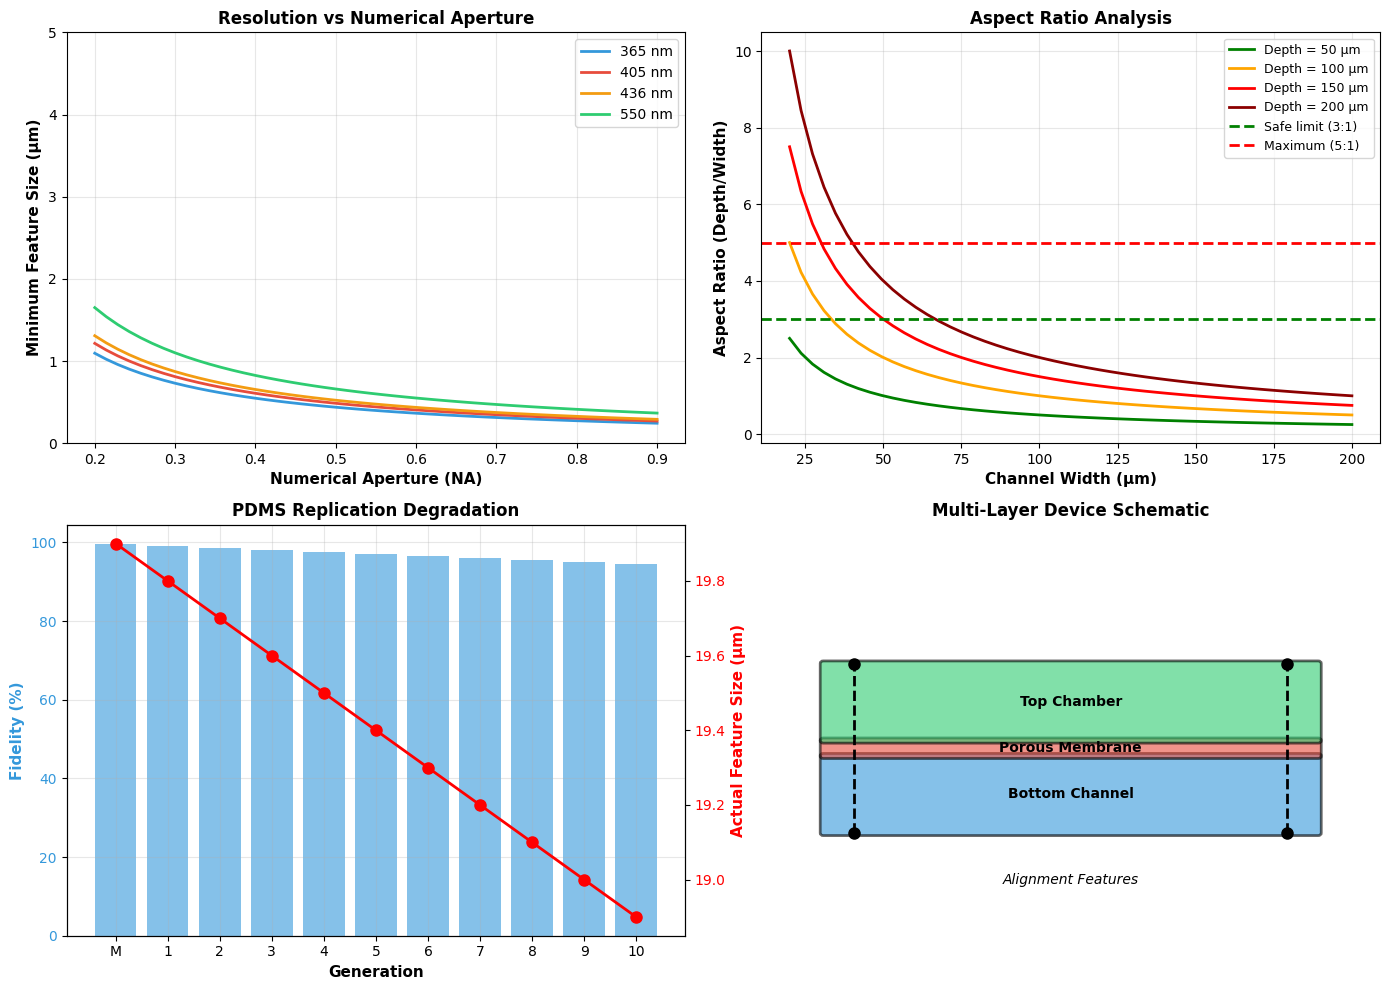


SECTION 6: FABRICATION METHOD COMPARISON

💰 COST ANALYSIS FOR DIFFERENT DEVICE QUANTITIES:
--------------------------------------------------------------------------------

Method                               10 devices |      100 devices |     1000 devices |     5000 devices
--------------------------------------------------------------------------------
Photolithography (in-house)    $  50,200 | $  52,000 | $  70,000 | $ 150,000
Soft Lithography (PDMS)        $   5,050 | $   5,500 | $  10,000 | $  30,000
Laser Cutting (PMMA)           $  30,150 | $  31,500 | $  45,000 | $ 105,000
3D Printing (SLA)              $  10,100 | $  11,000 | $  20,000 | $  60,000
Commercial Cleanroom           $   1,000 | $  10,000 | $ 100,000 | $ 500,000

📊 METHOD CHARACTERISTICS:
--------------------------------------------------------------------------------
Method                         Resolution   Throughput      Time/Device
---------------------------------------------------------------------------

In [2]:
# Chapter 3 - Exercise 3: Photolithography Pattern Designer
# Biofabrication Course - VU Brussels
# Interactive Python Exercise

"""
WHAT'S SPECIAL ABOUT EXERCISE 3:

This notebook covers:
• Photolithography fundamentals including resolution limits defined by wavelength and numerical aperture
• Rayleigh criterion for minimum feature size calculation
• Soft lithography principles for PDMS device fabrication
• Pattern fidelity analysis across multiple replication steps
• Aspect ratio considerations for microstructure integrity
• Multi-layer alignment strategies for complex 3D devices
• Cost and throughput comparisons between different lithography methods

KEY LEARNING FEATURES:
✓ Calculate minimum feature sizes based on optical parameters
✓ Design microfluidic channel patterns with appropriate dimensions
✓ Predict pattern degradation through multiple PDMS replication cycles
✓ Optimize aspect ratios for successful structure fabrication
✓ Plan multi-layer device fabrication with alignment tolerance
✓ Compare photolithography vs soft lithography for different applications
"""

import sys
!{sys.executable} -m pip install matplotlib numpy pandas seaborn plotly -q

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import seaborn as sns

print("="*80)
print("   CHAPTER 3 - EXERCISE 3: PHOTOLITHOGRAPHY PATTERN DESIGNER")
print("="*80)
print()

# ============================================================================
# SECTION 1: PHOTOLITHOGRAPHY FUNDAMENTALS
# ============================================================================

print("\n" + "="*80)
print("SECTION 1: RESOLUTION LIMITS IN PHOTOLITHOGRAPHY")
print("="*80)

print("""
🔬 RAYLEIGH CRITERION FOR RESOLUTION:

Minimum feature size = k₁ × λ / NA

where:
   k₁ = process factor (0.5-0.8, typically 0.6)
   λ = wavelength of light source
   NA = numerical aperture of lens system

Common light sources:
   • i-line (365 nm): Traditional UV lithography
   • g-line (436 nm): Near-UV lithography
   • Visible (400-700 nm): Contact lithography
""")

def calculate_resolution(wavelength_nm, numerical_aperture, process_factor=0.6):
    """Calculate minimum resolvable feature size using Rayleigh criterion"""
    wavelength_um = wavelength_nm / 1000
    min_feature = process_factor * wavelength_um / numerical_aperture
    return min_feature

def calculate_depth_of_focus(wavelength_nm, numerical_aperture, process_factor=0.6):
    """Calculate depth of focus"""
    wavelength_um = wavelength_nm / 1000
    DOF = process_factor * wavelength_um / (numerical_aperture ** 2)
    return DOF

# Lithography systems comparison
systems = {
    'Contact Lithography': {
        'wavelength': 365,
        'NA': 0.3,
        'cost': 'Low',
        'throughput': 'Low',
        'resolution_um': None
    },
    'Proximity Lithography': {
        'wavelength': 365,
        'NA': 0.25,
        'cost': 'Low',
        'throughput': 'Medium',
        'resolution_um': None
    },
    'Projection Lithography': {
        'wavelength': 365,
        'NA': 0.65,
        'cost': 'High',
        'throughput': 'High',
        'resolution_um': None
    },
    'Laser Direct Write': {
        'wavelength': 405,
        'NA': 0.9,
        'cost': 'Very High',
        'throughput': 'Low',
        'resolution_um': None
    },
    'Stepper (i-line)': {
        'wavelength': 365,
        'NA': 0.7,
        'cost': 'Very High',
        'throughput': 'Very High',
        'resolution_um': None
    }
}

# Calculate resolutions
for system_name, props in systems.items():
    resolution = calculate_resolution(props['wavelength'], props['NA'])
    systems[system_name]['resolution_um'] = resolution

print("\n📊 LITHOGRAPHY SYSTEM COMPARISON:")
print("-" * 80)
print(f"{'System':<25} {'λ (nm)':<10} {'NA':<8} {'Resolution':<15} {'Cost':<12} {'Throughput'}")
print("-" * 80)

for system, props in systems.items():
    print(f"{system:<25} {props['wavelength']:<10} {props['NA']:<8.2f} {props['resolution_um']:<8.2f} μm    {props['cost']:<12} {props['throughput']}")

# ============================================================================
# SECTION 2: DESIGN YOUR MICROPATTERN
# ============================================================================

print("\n" + "="*80)
print("SECTION 2: INTERACTIVE PATTERN DESIGNER")
print("="*80)

# Design parameters (STUDENTS CAN MODIFY THESE)
feature_size = 20  # micrometers (MODIFY THIS: try 5-200)
channel_width = 100  # micrometers (MODIFY THIS)
channel_depth = 50  # micrometers (MODIFY THIS)
wavelength = 365  # nm (MODIFY THIS: 365, 405, or 436)
NA = 0.6  # (MODIFY THIS: 0.2-0.9)

print("\n🎨 YOUR DESIGN PARAMETERS:")
print("-" * 50)
print(f"Target feature size:  {feature_size} μm")
print(f"Channel width:        {channel_width} μm")
print(f"Channel depth:        {channel_depth} μm")
print(f"Wavelength:           {wavelength} nm")
print(f"Numerical Aperture:   {NA}")

# Calculate if design is feasible
min_feature = calculate_resolution(wavelength, NA)
aspect_ratio = channel_depth / channel_width
DOF = calculate_depth_of_focus(wavelength, NA)

print(f"\n📐 CALCULATED PARAMETERS:")
print("-" * 50)
print(f"Minimum resolvable:   {min_feature:.2f} μm")
print(f"Depth of focus:       {DOF:.2f} μm")
print(f"Aspect ratio:         {aspect_ratio:.2f}")

# Feasibility checks
print(f"\n✓ FEASIBILITY ANALYSIS:")
print("-" * 50)

feasible = True

if feature_size >= min_feature:
    print(f"✅ Feature size ({feature_size} μm) > min resolution ({min_feature:.2f} μm)")
else:
    print(f"❌ Feature size ({feature_size} μm) < min resolution ({min_feature:.2f} μm)")
    print(f"   Solution: Use higher NA lens or shorter wavelength")
    feasible = False

if aspect_ratio <= 3:
    print(f"✅ Aspect ratio ({aspect_ratio:.2f}) is acceptable (< 3:1)")
elif aspect_ratio <= 5:
    print(f"⚠️ Aspect ratio ({aspect_ratio:.2f}) is challenging but possible")
else:
    print(f"❌ Aspect ratio ({aspect_ratio:.2f}) is too high - structure may collapse")
    print(f"   Solution: Increase channel width or decrease depth")
    feasible = False

if channel_depth <= DOF * 2:
    print(f"✅ Channel depth ({channel_depth} μm) within DOF range")
else:
    print(f"⚠️ Channel depth ({channel_depth} μm) exceeds DOF - use multi-exposure")

if feasible:
    print(f"\n🎉 DESIGN IS FEASIBLE!")
else:
    print(f"\n⚠️ DESIGN NEEDS MODIFICATION!")

# ============================================================================
# SECTION 3: SOFT LITHOGRAPHY & PDMS MOLDING
# ============================================================================

print("\n" + "="*80)
print("SECTION 3: SOFT LITHOGRAPHY REPLICATION FIDELITY")
print("="*80)

print("""
🔄 SOFT LITHOGRAPHY PROCESS:
   1. Photolithography creates master (SU-8 on silicon)
   2. PDMS is cast from master → First generation mold
   3. PDMS mold can replicate master pattern
   4. Each generation has slight degradation
""")

def replication_fidelity(generation, initial_accuracy=99.5):
    """Model pattern fidelity loss through generations"""
    # Each generation loses ~0.5% accuracy
    degradation_per_gen = 0.5
    accuracy = initial_accuracy - (generation * degradation_per_gen)
    return max(90, accuracy)  # Minimum 90% fidelity

def calculate_feature_error(target_size, generation):
    """Calculate feature size error for given generation"""
    fidelity = replication_fidelity(generation)
    actual_size = target_size * (fidelity / 100)
    error = target_size - actual_size
    return actual_size, error

print("\n🔬 REPLICATION FIDELITY ANALYSIS:")
print("-" * 50)
print(f"Target feature size: {feature_size} μm")
print()
print(f"{'Generation':<12} {'Fidelity':<12} {'Actual Size':<15} {'Error':<10}")
print("-" * 50)

for gen in range(0, 11):
    fidelity = replication_fidelity(gen)
    actual, error = calculate_feature_error(feature_size, gen)

    if gen == 0:
        print(f"{'Master':<12} {fidelity:>6.1f}%     {actual:>8.2f} μm      {error:>6.2f} μm")
    else:
        print(f"{'Gen ' + str(gen):<12} {fidelity:>6.1f}%     {actual:>8.2f} μm      {error:>6.2f} μm")

print("\n💡 Recommendation: Use master or Gen 1-3 for highest fidelity")

# ============================================================================
# SECTION 4: MULTI-LAYER ALIGNMENT
# ============================================================================

print("\n" + "="*80)
print("SECTION 4: MULTI-LAYER DEVICE FABRICATION")
print("="*80)

print("""
🏗️ MULTI-LAYER ALIGNMENT:
   Many organ-chips need multiple layers:
   • Layer 1: Bottom channel (e.g., vascular channel)
   • Layer 2: Porous membrane
   • Layer 3: Top channel (e.g., tissue chamber)

   Critical: Alignment tolerance must be < smallest feature
""")

def alignment_tolerance(feature_size, accuracy_percent=95):
    """Calculate required alignment tolerance"""
    # Rule of thumb: alignment should be 1/10 of smallest feature
    max_misalignment = feature_size * (1 - accuracy_percent/100)
    recommended_tolerance = feature_size / 10
    return recommended_tolerance, max_misalignment

# Multi-layer design example
layers = {
    'Layer 1 (Bottom)': {
        'features': ['200 μm wide channels', '50 μm pillars'],
        'min_feature': 50,
        'critical': True
    },
    'Layer 2 (Membrane)': {
        'features': ['10 μm pores', 'Thin membrane (10 μm)'],
        'min_feature': 10,
        'critical': True
    },
    'Layer 3 (Top)': {
        'features': ['500 μm chambers', '100 μm inlets'],
        'min_feature': 100,
        'critical': False
    }
}

print("\n🏗️ EXAMPLE: 3-LAYER ORGAN-ON-CHIP DESIGN")
print("-" * 80)

min_feature_overall = min([layer['min_feature'] for layer in layers.values()])
tolerance, max_error = alignment_tolerance(min_feature_overall)

print(f"\nSmallest feature across all layers: {min_feature_overall} μm")
print(f"Required alignment tolerance:       {tolerance:.1f} μm")
print(f"Maximum acceptable misalignment:    {max_error:.1f} μm")
print()

for layer_name, layer_info in layers.items():
    print(f"\n{layer_name}:")
    print(f"  Features: {', '.join(layer_info['features'])}")
    print(f"  Minimum feature: {layer_info['min_feature']} μm")
    print(f"  Critical for alignment: {'Yes' if layer_info['critical'] else 'No'}")

# ============================================================================
# SECTION 5: VISUALIZATION
# ============================================================================

print("\n" + "="*80)
print("SECTION 5: PATTERN DESIGN VISUALIZATION")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Resolution vs NA for different wavelengths
ax1 = axes[0, 0]
NA_range = np.linspace(0.2, 0.9, 50)
wavelengths = [365, 405, 436, 550]
colors = ['#3498db', '#e74c3c', '#f39c12', '#2ecc71']

for wl, color in zip(wavelengths, colors):
    resolutions = [calculate_resolution(wl, na) for na in NA_range]
    ax1.plot(NA_range, resolutions, linewidth=2, label=f'{wl} nm', color=color)

ax1.set_xlabel('Numerical Aperture (NA)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Minimum Feature Size (μm)', fontsize=11, fontweight='bold')
ax1.set_title('Resolution vs Numerical Aperture', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 5])

# Plot 2: Aspect ratio feasibility
ax2 = axes[0, 1]
widths = np.linspace(20, 200, 50)
depths = [50, 100, 150, 200]
colors2 = ['green', 'orange', 'red', 'darkred']

for depth, color in zip(depths, colors2):
    aspect_ratios = [depth / w for w in widths]
    ax2.plot(widths, aspect_ratios, linewidth=2, label=f'Depth = {depth} μm', color=color)

ax2.axhline(3, color='green', linestyle='--', linewidth=2, label='Safe limit (3:1)')
ax2.axhline(5, color='red', linestyle='--', linewidth=2, label='Maximum (5:1)')
ax2.set_xlabel('Channel Width (μm)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Aspect Ratio (Depth/Width)', fontsize=11, fontweight='bold')
ax2.set_title('Aspect Ratio Analysis', fontsize=12, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

# Plot 3: Replication fidelity
ax3 = axes[1, 0]
generations = list(range(0, 11))
fidelities = [replication_fidelity(g) for g in generations]
feature_sizes = [calculate_feature_error(feature_size, g)[0] for g in generations]

ax3_twin = ax3.twinx()
ax3.bar(generations, fidelities, alpha=0.6, color='#3498db', label='Fidelity')
ax3_twin.plot(generations, feature_sizes, 'ro-', linewidth=2, markersize=8, label='Feature size')

ax3.set_xlabel('Generation', fontsize=11, fontweight='bold')
ax3.set_ylabel('Fidelity (%)', fontsize=11, fontweight='bold', color='#3498db')
ax3_twin.set_ylabel('Actual Feature Size (μm)', fontsize=11, fontweight='bold', color='red')
ax3.set_title('PDMS Replication Degradation', fontsize=12, fontweight='bold')
ax3.tick_params(axis='y', labelcolor='#3498db')
ax3_twin.tick_params(axis='y', labelcolor='red')
ax3.grid(True, alpha=0.3)
ax3.set_xticks(generations)
ax3.set_xticklabels(['M'] + [str(i) for i in range(1, 11)])

# Plot 4: Multi-layer schematic
ax4 = axes[1, 1]
ax4.set_xlim(0, 10)
ax4.set_ylim(0, 8)
ax4.axis('off')
ax4.set_title('Multi-Layer Device Schematic', fontsize=12, fontweight='bold')

# Draw layers
layer_colors = ['#3498db', '#e74c3c', '#2ecc71']
layer_heights = [1.5, 0.3, 1.5]
layer_names = ['Bottom Channel', 'Porous Membrane', 'Top Chamber']
y_pos = 2

for i, (color, height, name) in enumerate(zip(layer_colors, layer_heights, layer_names)):
    rect = patches.FancyBboxPatch((1, y_pos), 8, height,
                                  boxstyle="round,pad=0.05",
                                  edgecolor='black', facecolor=color,
                                  alpha=0.6, linewidth=2)
    ax4.add_patch(rect)
    ax4.text(5, y_pos + height/2, name,
            ha='center', va='center', fontsize=10, fontweight='bold')
    y_pos += height

# Add alignment markers
for x in [1.5, 8.5]:
    ax4.plot([x, x], [2, 2+sum(layer_heights)], 'k--', linewidth=2)
    ax4.plot(x, 2, 'ko', markersize=8)
    ax4.plot(x, 2+sum(layer_heights), 'ko', markersize=8)

ax4.text(5, 1, 'Alignment Features', ha='center', fontsize=10, style='italic')

plt.tight_layout()
plt.show()

# ============================================================================
# SECTION 6: COST-BENEFIT ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("SECTION 6: FABRICATION METHOD COMPARISON")
print("="*80)

methods = {
    'Photolithography (in-house)': {
        'setup_cost': 50000,
        'cost_per_device': 20,
        'time_per_device': 240,  # minutes
        'resolution': 2,  # μm
        'throughput': 10  # devices/day
    },
    'Soft Lithography (PDMS)': {
        'setup_cost': 5000,
        'cost_per_device': 5,
        'time_per_device': 480,  # minutes (including curing)
        'resolution': 5,  # μm
        'throughput': 20  # devices/day
    },
    'Laser Cutting (PMMA)': {
        'setup_cost': 30000,
        'cost_per_device': 15,
        'time_per_device': 30,  # minutes
        'resolution': 50,  # μm
        'throughput': 50  # devices/day
    },
    '3D Printing (SLA)': {
        'setup_cost': 10000,
        'cost_per_device': 10,
        'time_per_device': 180,  # minutes
        'resolution': 25,  # μm
        'throughput': 15  # devices/day
    },
    'Commercial Cleanroom': {
        'setup_cost': 0,
        'cost_per_device': 100,
        'time_per_device': 1440,  # minutes (including turnaround)
        'resolution': 0.5,  # μm
        'throughput': 5  # devices/day
    }
}

def calculate_total_cost(method, num_devices):
    """Calculate total cost including setup and per-device costs"""
    setup = methods[method]['setup_cost']
    per_device = methods[method]['cost_per_device']
    total = setup + (num_devices * per_device)
    return total

print("\n💰 COST ANALYSIS FOR DIFFERENT DEVICE QUANTITIES:")
print("-" * 80)

quantities = [10, 100, 1000, 5000]
print(f"\n{'Method':<30} {' | '.join([f'{q:>8} devices' for q in quantities])}")
print("-" * 80)

for method in methods.keys():
    costs = [calculate_total_cost(method, q) for q in quantities]
    cost_str = ' | '.join([f'${c:>8,.0f}' for c in costs])
    print(f"{method:<30} {cost_str}")

print("\n📊 METHOD CHARACTERISTICS:")
print("-" * 80)
print(f"{'Method':<30} {'Resolution':<12} {'Throughput':<15} {'Time/Device'}")
print("-" * 80)

for method, props in methods.items():
    print(f"{method:<30} {props['resolution']:>6} μm     {props['throughput']:>6}/day     {props['time_per_device']:>6} min")

# ============================================================================
# SECTION 7: STUDENT EXPLORATION TASKS
# ============================================================================

print("\n" + "="*80)
print("SECTION 7: HANDS-ON EXPLORATION")
print("="*80)

print("""
🎯 STUDENT TASKS:

Task 1: OPTIMIZE FOR MICROFLUIDIC CHANNELS
   Design specification: 50 μm wide channels, 100 μm deep
   • Calculate minimum NA required for λ = 365 nm
   • Is the aspect ratio acceptable?
   • Which lithography system would you choose?

Task 2: MULTI-GENERATION PDMS MOLDING
   You need 500 devices, starting from one master
   • How many devices per generation to maintain >95% fidelity?
   • Should you make multiple masters?
   • Calculate total fabrication time

Task 3: BUDGET CONSTRAINT SCENARIO
   Budget: $20,000, Need: 2000 devices, Resolution: 10 μm
   • Which method(s) are feasible?
   • What is the cost per device for each option?
   • Include setup costs in your analysis

Task 4: DESIGN A 3-LAYER ORGAN CHIP
   Requirements:
   • Layer 1: 100 μm channels
   • Layer 2: 5 μm membrane pores
   • Layer 3: 200 μm chambers
   • What is the critical alignment tolerance?
   • Which features determine the required resolution?

MODIFY THESE PARAMETERS IN SECTION 2 AND RE-RUN:
   feature_size = 20    # Try: 1-200 μm
   channel_width = 100  # Try: 20-1000 μm
   channel_depth = 50   # Try: 10-500 μm
   wavelength = 365     # Try: 365, 405, 436 nm
   NA = 0.6            # Try: 0.2-0.9
""")

# ============================================================================
# SECTION 8: REFLECTION QUESTIONS
# ============================================================================

print("\n" + "="*80)
print("SECTION 8: REFLECTION QUESTIONS")
print("="*80)

print("""
Answer these questions based on your exploration:

1. RESOLUTION TRADE-OFFS:
   Higher NA gives better resolution but smaller depth of focus
   For a 100 μm deep channel, which is more important?

2. SOFT LITHOGRAPHY ADVANTAGES:
   Why is soft lithography preferred for organ-chips despite lower resolution?
   What are the key advantages over traditional photolithography?

3. REPLICATION STRATEGY:
   When should you make multiple masters instead of multiple generations?
   Consider fidelity, cost, and time factors

4. ASPECT RATIO LIMITS:
   You need 500 μm deep channels for thick tissue constructs
   What is the minimum channel width for stable structures?

5. METHOD SELECTION:
   For a startup developing organ-chips for drug testing:
   - Which fabrication method would you recommend?
   - Consider: initial investment, device cost, resolution, throughput
   - Justify your choice

Write your answers here:
__________________________________________________________________________
__________________________________________________________________________
__________________________________________________________________________
""")

print("\n" + "="*80)
print("🎉 EXERCISE 3 COMPLETE!")
print("="*80)
print("Key Takeaways:")
print("✓ Resolution depends on wavelength, NA, and process factors")
print("✓ Aspect ratio limits determine structure feasibility")
print("✓ Soft lithography enables cost-effective replication")
print("✓ Multi-layer devices require careful alignment planning")
print("\n📚 Ready for Exercise 4: Organ-on-Chip Perfusion Optimizer!")